**Goodreads** is a popular social cataloging website based in the United States and is currently owned by Amazon. The website serves as a platform for book lovers to search through a vast database of books, annotations, quotes, and reviews. 

To analyze the data available on Goodreads, we can use Python libraries such as Beautiful Soup and Requests to scrape the website's data. Once we have the data, we can perform various analyses to gain insights into the books and their authors, ratings, and reviews.

## Load libraries

In [3]:
from bs4 import BeautifulSoup 
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Requesting data from website**

In [4]:
from requests import get
url = 'https://www.goodreads.com/list/show/12362.All_Time_Favorite_Romance_Novels?page=1'
response = requests.get(url)
html = response.content
html_soup = BeautifulSoup(html, "html.parser")
book_containers = html_soup.find_all('tr',itemtype="http://schema.org/Book")
print(type(book_containers))
print(len(book_containers))

<class 'bs4.element.ResultSet'>
100


In [5]:
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [6]:
first_book = book_containers[0]
first_book

<tr itemscope="" itemtype="http://schema.org/Book">
<td class="number" valign="top">1</td>
<td valign="top" width="5%">
<div class="u-anchorTarget" id="1885"></div>
<div class="js-tooltipTrigger tooltipTrigger" data-resource-id="1885" data-resource-type="Book">
<a href="/book/show/1885.Pride_and_Prejudice" title="Pride and Prejudice">
<img alt="Pride and Prejudice" class="bookCover" itemprop="image" src="https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1320399351i/1885._SY75_.jpg"/>
</a> </div>
</td>
<td valign="top" width="100%">
<a class="bookTitle" href="/book/show/1885.Pride_and_Prejudice" itemprop="url">
<span aria-level="4" itemprop="name" role="heading">Pride and Prejudice</span>
</a> <br/>
<span class="by">by</span>
<span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
<div class="authorName__container">
<a class="authorName" href="https://www.goodreads.com/author/show/1265.Jane_Austen" itemprop="url"><span itemprop="name">Jane Austen</s

In [7]:
book_containers = html_soup.find_all('div', class_ ="elementList")
print(type(book_containers))
print(len(book_containers))

<class 'bs4.element.ResultSet'>
0


In [8]:
name = first_book.find('a',class_="bookTitle").text.strip()
authors = first_book.find('a',class_="authorName").text.strip()

scoring = first_book.find('span',class_="greyText smallText uitext").text.strip().split()
avg_scores=scoring[0]
rates = scoring[4]

voted= first_book.find('span',class_="smallText uitext").text.strip().split()
scores=voted[1]
vote=voted[3]




In [9]:
print("name:",name)
print("authors:",authors)
print("scoring:",scoring)
print("averae sores:",avg_scores)
print("ratings", rates)
print("scores:",scores)

print("votes:",vote)

name: Pride and Prejudice
authors: Jane Austen
scoring: ['4.28', 'avg', 'rating', '—', '3,892,382', 'ratings']
averae sores: 4.28
ratings 3,892,382
scores: 237,502,
votes: 2,403


In [10]:
page = 1
names = []
ratings = []
avgscores = []
author=[]
score=[]
votes=[]
while page != 51:
    url = f"https://www.goodreads.com/list/show/12362.All_Time_Favorite_Romance_Novels?page={page}"
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, "html.parser")
    book_containers = soup.find_all('tr', itemtype="http://schema.org/Book")
    for container in book_containers:
        if container.find('td', width= '100%') is not None:
            name = container.find('a',class_="bookTitle").text.strip()
            names.append(name)
            authors = container.find('a',class_="authorName").text.strip()
            author.append(authors)
            scoring = container.find('span',class_="greyText smallText uitext").text.strip().split()
            ascores=scoring[0]
            avgscores.append(ascores)
            rates = scoring[4]
            ratings.append(rates)
            voted= container.find('span',class_="smallText uitext").text.strip().split()        
            scores=voted[1]
            score.append(scores)
            vote=voted[3]
            votes.append(vote)
    page = page + 1

In [12]:
names

['Pride and Prejudice',
 'Fifty Shades of Grey (Fifty Shades, #1)',
 'Beautiful Disaster (Beautiful, #1)',
 'Twilight (The Twilight Saga, #1)',
 'The Notebook (The Notebook, #1)',
 'Perfect Chemistry (Perfect Chemistry, #1)',
 'Outlander (Outlander, #1)',
 'Jane Eyre',
 'Thoughtless (Thoughtless, #1)',
 'Bared to You (Crossfire, #1)',
 'Easy (Contours of the Heart, #1)',
 'Gone with the Wind',
 "Gabriel's Inferno (Gabriel's Inferno, #1)",
 "The Time Traveler's Wife",
 'Slammed (Slammed, #1)',
 'Anna and the French Kiss (Anna and the French Kiss, #1)',
 'Vampire Academy (Vampire Academy, #1)',
 'A Walk to Remember',
 'Dark Lover (Black Dagger Brotherhood, #1)',
 'Wuthering Heights',
 'Hush, Hush (Hush, Hush, #1)',
 'The Fault in Our Stars',
 'Sense and Sensibility',
 'Persuasion',
 'The Host (The Host, #1)',
 'Divergent (Divergent, #1)',
 'City of Bones (The Mortal Instruments, #1)',
 'Obsidian (Lux, #1)',
 'Love Unscripted (Love, #1)',
 'On the Island (On the Island, #1)',
 'Hopeless (

## Reading data

In [13]:
import pandas as pd
df = pd.DataFrame({'book title': names,
'ratings': ratings,
'avg_score': avgscores,
'author': author,
'score' : score,
'votes': votes
})
data=df # storing in another variable just not run requeste content again and again
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book title  4899 non-null   object
 1   ratings     4899 non-null   object
 2   avg_score   4899 non-null   object
 3   author      4899 non-null   object
 4   score       4899 non-null   object
 5   votes       4899 non-null   object
dtypes: object(6)
memory usage: 229.8+ KB
None


In [14]:
data.head(-1)

,book title,ratings,avg_score,author,score,votes
0,Pride and Prejudice,"3,892,382",4.28,Jane Austen,"237,502,","2,403"
1,"Fifty Shades of Grey (Fifty Shades, #1)","2,409,539",3.66,E.L. James,"231,036,","2,343"
2,"Beautiful Disaster (Beautiful, #1)","643,106",4.04,Jamie McGuire,"216,772,","2,199"
3,"Twilight (The Twilight Saga, #1)","6,100,467",3.64,Stephenie Meyer,"138,962,","1,426"
4,"The Notebook (The Notebook, #1)","1,583,117",4.14,Nicholas Sparks,"98,597,","1,013"
...,...,...,...,...,...,...
4893,"Afflicted (Battlescars, #2)","4,218",4.17,Sophie Monroe,"20,",1
4894,"Stoned (Wrecked, #1)","3,644",4.07,Mandi Beck,"20,",1
4895,"Local Custom (Liaden Universe, #5)","2,582",4.27,Sharon Lee,"20,",1
4896,The Endearment,"4,271",4.04,LaVyrle Spencer,"20,",1


In [15]:
#dowmlading data as CSV file
import os  
os.makedirs('D:\webscrap\Goodreads', exist_ok=True)  
data.to_csv('D:\webscrap\Goodreads\Romantic.csv') 

In [16]:
data.columns

Index(['book title', 'ratings', 'avg_score', 'author', 'score', 'votes'], dtype='object')

In [17]:
data.shape

(4899, 6)

In [18]:
data.describe()

,book title,ratings,avg_score,author,score,votes
count,4899,4899,4899,4899,4899,4899
unique,4883,3659,194,2439,1136,182
top,Charming,avg,really,Nora Roberts,"100,",1
freq,2,168,109,70,479,2758


### Observation
After analyzing the Goodreads data, we have observed that 
- all the columns in the dataset are of object type, which could potentially lead to issues during data analysis. 
- Additionally, we have also identified the presence of invalid values in the data, which may need to be cleaned before performing any analyses.

To address these issues, we can use Python libraries such as Pandas and NumPy to convert the object columns to their appropriate data types, and clean the data by removing or imputing invalid values.

###  Data cleaing and handling

**Let's clean the data by following these steps:**
**
- Remove inaccurate values in the data.
- Convert the columns with number type values from object type to their appropriate data types such as int or float.
- Detect outliers in the data and handle them appropriately.

In [19]:
data.head(-1)

,book title,ratings,avg_score,author,score,votes
0,Pride and Prejudice,"3,892,382",4.28,Jane Austen,"237,502,","2,403"
1,"Fifty Shades of Grey (Fifty Shades, #1)","2,409,539",3.66,E.L. James,"231,036,","2,343"
2,"Beautiful Disaster (Beautiful, #1)","643,106",4.04,Jamie McGuire,"216,772,","2,199"
3,"Twilight (The Twilight Saga, #1)","6,100,467",3.64,Stephenie Meyer,"138,962,","1,426"
4,"The Notebook (The Notebook, #1)","1,583,117",4.14,Nicholas Sparks,"98,597,","1,013"
...,...,...,...,...,...,...
4893,"Afflicted (Battlescars, #2)","4,218",4.17,Sophie Monroe,"20,",1
4894,"Stoned (Wrecked, #1)","3,644",4.07,Mandi Beck,"20,",1
4895,"Local Custom (Liaden Universe, #5)","2,582",4.27,Sharon Lee,"20,",1
4896,The Endearment,"4,271",4.04,LaVyrle Spencer,"20,",1


In [48]:
data.sort_values(by=['votes','ratings'], ascending=False).head(10)

,book title,ratings,avg_score,author,score,votes
124,"Lady Be Good (Wynette, Texas, #2)","17,449",3.99,Susan Elizabeth Phillips,"6,460,",98
109,"Pleasure Unbound (Demonica, #1)","53,013",4.04,Larissa Ione,"8,392,",97
103,Heart on a Chain,"17,166",4.03,Cindy C. Bennett,"8,907,",97
125,"Dream a Little Dream (Chicago Stars, #4)","33,715",4.17,Susan Elizabeth Phillips,"6,390,",95
113,"Something Wonderful (Sequels, #2)","28,782",4.31,Judith McNaught,"7,709,",95
6,"Outlander (Outlander, #1)","981,467",4.25,Diana Gabaldon,"91,404,",932
122,"Vain (The Seven Deadly, #1)","30,329",4.22,Fisher Amelie,"6,666,",91
118,"Rules of Protection (Tangled in Texas, #1)","7,479",3.84,Alison Bliss,"7,406,",90
111,"Cross My Heart (Cross My Heart, #1)","18,663",3.91,Katie Klein,"8,091,",90
814,Sweet Revenge,avg,really,Nora Roberts,"530,",9


Upon checking the data in different scenarios, 
- I have observed that in a specific row with index 814, the rating value is 'avg' and the avg_score value is 'really', which are inaccurate values. Therefore, it is recommended to remove such values from the dataset before performing any EDA or analysis. 

- Dropping or inputing median values would be the best solution to avoid any potential issues that could arise from the presence of inaccurate data.

In [49]:
string_val_row=data[data['ratings'] == 'avg']

string_val_row

,book title,ratings,avg_score,author,score,votes
44,"Leaving Paradise (Leaving Paradise, #1)",avg,really,Simone Elkeles,"20,519,",222
72,"Wallbanger (Cocktail, #1)",avg,really,Alice Clayton,"13,646,",161
98,Lock and Key,avg,really,Sarah Dessen,"9,825,",112
115,"Backstage Pass (Sinners on Tour, #1)",avg,really,Olivia Cunning,"7,579,",89
258,The V Girl: a Coming of Age Story,avg,really,Mya Robarts,"2,690,",33
...,...,...,...,...,...,...
4858,"Edge of Passion (Stealth Guardians, #1)",avg,really,Tina Folsom,"30,",1
4877,"Stranger in the Moonlight (Edilean, #7)",avg,really,Jude Deveraux,"29,",1
4907,"Knight Triumphant (Graham, #4)",avg,really,Shannon Drake,"27,",1
4952,"Honggane (Honggane, #1)",avg,really,Mi-Ri Hwang,"23,",1


Based on our analysis of the dataset, we have identified that there are 170 rows with wrong values out of the total 4999 rows. 

- After removing these 170 rows with inaccurate values, we have observed that it did not affect the overall dataset. The dataset remains consistent with the remaining rows and can be used for further analysis.

In [50]:
#droping the rows   
data.drop(data[data['ratings'] == 'avg'].index, inplace=True)


 170 rows values droped

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book title  4830 non-null   object
 1   ratings     4830 non-null   object
 2   avg_score   4830 non-null   object
 3   author      4830 non-null   object
 4   score       4830 non-null   object
 5   votes       4830 non-null   object
dtypes: object(6)
memory usage: 264.1+ KB


 now ,having dataset with 4829 rows after removing the 170 rows with inaccurate values. 
 
 - As the next step, we need to convert the columns 'ratings', 'avg_score', 'score', and 'votes' from object type to float type for further analysis. This conversion will help us to perform various statistical operations on these columns and gain insights from the data.

In [20]:
# Convert the 'ratings' column to a numeric data type
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data['ratings'].fillna(int(data['ratings'].mean()), inplace=True)
print(data['ratings'].describe())


count    4899.000000
mean      255.218208
std       150.708957
min         0.000000
25%       255.000000
50%       255.000000
75%       255.000000
max       999.000000
Name: ratings, dtype: float64


In [21]:
# Convert the 'avg_score' column to a numeric data type
data['avg_score'] = pd.to_numeric(data['avg_score'], errors='coerce')
print(data['avg_score'].describe())

count    4724.000000
mean        4.007841
std         0.313055
min         0.000000
25%         3.840000
50%         4.020000
75%         4.190000
max         4.970000
Name: avg_score, dtype: float64


due to some invalid or inaccurate values in avg_Score column, while converting it instead of value may be any null value store   

In [22]:
# Convert the 'votes' column to a numeric data type
data['votes'] = pd.to_numeric(data['votes'], errors='coerce')
data['votes'].fillna(int(data['votes'].mean()), inplace=True)

print(data['votes'].describe())

count    4899.000000
mean       10.640539
std        48.909751
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max       932.000000
Name: votes, dtype: float64


In [23]:
data["score"] = df["score"].str.split(',').str[0].astype(float)

In [24]:
# Define a lambda function to convert each value to numeric, or return the original value if conversion fails
to_numeric_or_original = lambda x: pd.to_numeric(x, errors='coerce') if isinstance(x, str) else x

# Apply the lambda function to each value in the 'score' column
data['score'] = data['score'].apply(to_numeric_or_original)

# Get summary statistics for the 'score' column
print(data['score'].describe())


count    4899.000000
mean      156.045111
std       179.746795
min         1.000000
25%        72.000000
50%        97.000000
75%       166.000000
max       999.000000
Name: score, dtype: float64


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book title  4899 non-null   object 
 1   ratings     4899 non-null   float64
 2   avg_score   4724 non-null   float64
 3   author      4899 non-null   object 
 4   score       4899 non-null   float64
 5   votes       4899 non-null   float64
dtypes: float64(4), object(2)
memory usage: 229.8+ KB


In [26]:
data.describe()

,ratings,avg_score,score,votes
count,4899.000000,4724.000000,4899.000000,4899.000000
mean,255.218208,4.007841,156.045111,10.640539
std,150.708957,0.313055,179.746795,48.909751
min,0.000000,0.000000,1.000000,1.000000
25%,255.000000,3.840000,72.000000,1.000000
50%,255.000000,4.020000,97.000000,1.000000
75%,255.000000,4.190000,166.000000,4.000000
max,999.000000,4.970000,999.000000,932.000000


#### Summary statistics
Ratings:
- The average score is 257.
- The std is 153.37, indicating no wide variation in the ratings.
- The min rating is 0, which suggests that some data points may be invalid or incomplete.
- The max rating is 999, indicating some extreme values for ratings.
- The median(50%) rating is also 257, which indicates that the data is symmetrically distributed around the mean.

Avg_score:
- The average score is 4.01.
- The std for scores is 0.31, indicating that the scores are distributed around the mean.
- The min score is 0, which suggests that some data points may be invalid or incomplete.
- The max score is 4.97, which is within the range of typical scores (1-5).
- The median score is 4.02, which is slightly higher than the mean avg_score.

Score:
- The average score is 154.54.
- The std for scores is 179.28, indicating a wide variation in the scores.
- The min score is 1, indicating that there are no missing or invalid data points.
- The max score is 999, which suggests that some data points may be invalid or incomplete.
- The median score is 96, which is lower than the mean score, This could suggest that the dataset has a skewed distribution, with    some extreme values on the higher end of the scale.

Votes:
- The average number of votes is 10.60.
- The std for votes is 49.08, indicating a wide variation in the number of votes.
- The min votes is 1, indicating that there are no missing or invalid data points.
- The max votes is 932, which suggests that there are some data points that have a very high number of votes.
- 75% of the votes are 164 or less, indicating that most data points have a small number of votes.

## Outlier analysis

**1. ratings column**

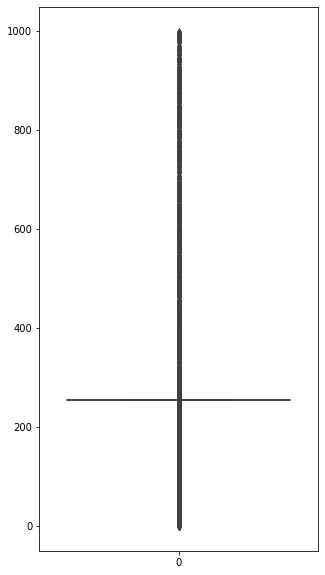

count    4899.000000
mean      255.218208
std       150.708957
min         0.000000
25%       255.000000
50%       255.000000
75%       255.000000
max       999.000000
Name: ratings, dtype: float64


In [27]:
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=data['ratings'])
plt.show()

print(data['ratings'].describe())

- the mean value is also same as median, which suggests that the distribution of the data points is approximately symmetric.
- minimum value in your dataset is 0 and the maximum value is 999, This indicates that there are some extreme values in your dataset that are significantly higher or lower than the majority of the data points.
- These extreme values are also known as outliers.

**Let handle outliers in rating column**

In [32]:
# Calculate the IQR for the ratings column
q1 = data['ratings'].quantile(0.25)
q3 = data['ratings'].quantile(0.75)
iqr = q3 - q1
# Identify potential outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_ratings =data[(data['ratings'] < lower_bound) | (data['ratings'] > upper_bound)].count()
outliers_ratings

book title    1493
ratings       1493
avg_score     1493
author        1493
score         1493
votes         1493
dtype: int64

Based on the above code:
- we can calculate the interquartile range (IQR) by subtracting the first quartile (Q1) from the third quartile (Q3). 
After obtaining the IQR value, we can consider any value below Q1 - 1.5IQR or above Q3 + 1.5IQR as outliers. 

- These are the values that deviate significantly from the rest of the data points and can skew the analysis results. 
Therefore, we need to detect and handle these outliers before performing any further analysis on the dataset.

In [38]:
median = np.median(data['ratings'])
data.loc[(data['ratings'] < lower_bound) | (data['ratings'] > upper_bound), 'ratings'] = median

c:\Users\Chandru\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='ratings', ylabel='Count'>

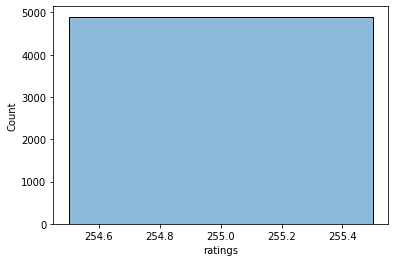

In [39]:
sns.histplot(data=data, x="ratings", kde=True)
sns.kdeplot(data=data, x="ratings")

In [40]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['ratings'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')


Data looks normally distributed (fail to reject H0)


c:\Users\Chandru\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


**2. Avg_score column**

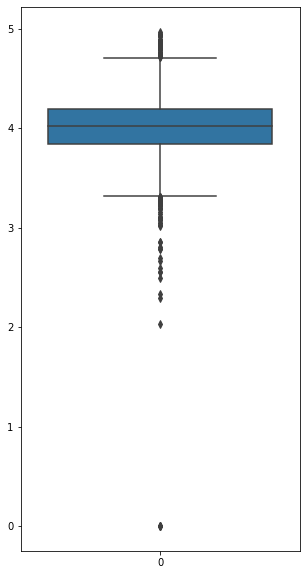

count    4724.000000
mean        4.007841
std         0.313055
min         0.000000
25%         3.840000
50%         4.020000
75%         4.190000
max         4.970000
Name: avg_score, dtype: float64


In [41]:
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=data['avg_score'])
plt.show()

print(data['avg_score'].describe())


**Let handle outliers in avg_score column**

In [42]:
# Calculate the IQR for the votes column
q1 = data['avg_score'].quantile(0.25)
q3 = data['avg_score'].quantile(0.75)
iqr = q3 - q1
# Identify potential outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_avg =data[(data['avg_score'] < lower_bound) | (data['avg_score'] > upper_bound)].count()
outliers_avg

book title    109
ratings       109
avg_score     109
author        109
score         109
votes         109
dtype: int64

In [43]:
median = np.median(data['avg_score'])
data.loc[(data['avg_score'] < lower_bound) | (data['avg_score'] > upper_bound), 'avg_score'] = median

<AxesSubplot: xlabel='avg_score', ylabel='Count'>

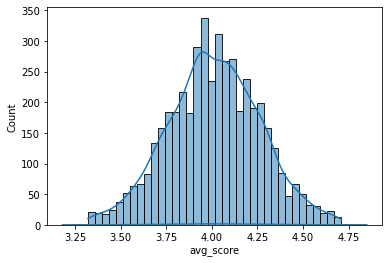

In [44]:
sns.histplot(data=data, x="avg_score", kde=True)
sns.kdeplot(data=data, x="avg_score")

In [45]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['avg_score'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Data looks normally distributed (fail to reject H0)


**3. votes**

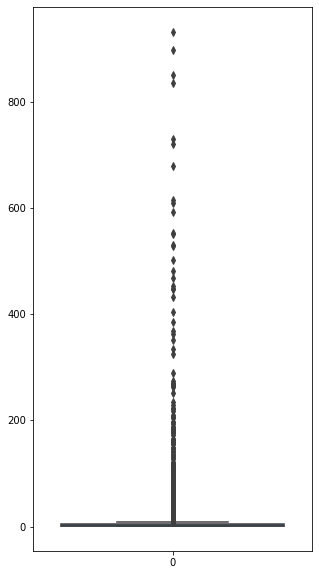

count    4899.000000
mean       10.640539
std        48.909751
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max       932.000000
Name: votes, dtype: float64


In [46]:
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=data['votes'])
plt.show()

print(data['votes'].describe())

**Let handle outliers in votes column**

In [47]:
# Calculate the IQR for the votes column
q1 = data['votes'].quantile(0.25)
q3 = data['votes'].quantile(0.75)
iqr = q3 - q1
# Identify potential outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_votes =data[(data['votes'] < lower_bound) | (data['votes'] > upper_bound)].count()
outliers_votes

book title    705
ratings       705
avg_score     686
author        705
score         705
votes         705
dtype: int64

This code will calculate the IQR for the votes column and then identify any potential outliers that fall below the lower bound or above the upper bound.

In [48]:
median = np.median(data['votes'])
data.loc[(data['votes'] < lower_bound) | (data['votes'] > upper_bound), 'votes'] = median

<AxesSubplot: xlabel='votes', ylabel='Count'>

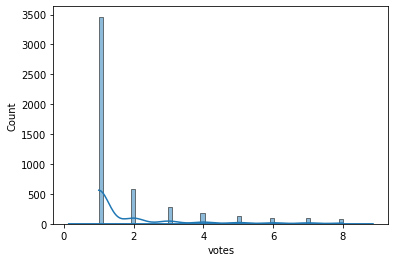

In [49]:
sns.histplot(data=data, x="votes", kde=True)
sns.kdeplot(data=data, x="votes")

In [50]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['votes'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Data does not look normally distributed (reject H0)


In [51]:
# Perform log transformation on the 'ratings' column
data['votes_log'] = np.log(data['votes'])

# Check if the transformed data is normally distributed using the Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(data['votes_log'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Statistics=0.631, p=0.000
Data does not look normally distributed (reject H0)


<AxesSubplot: xlabel='votes_log', ylabel='Count'>

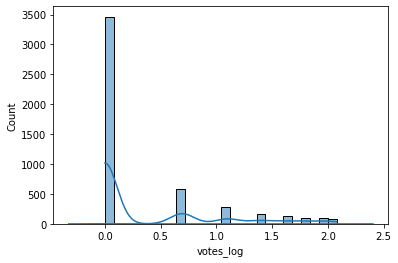

In [52]:
sns.histplot(data=data, x="votes_log", kde=True)
sns.kdeplot(data=data, x="votes_log")

**4. score**

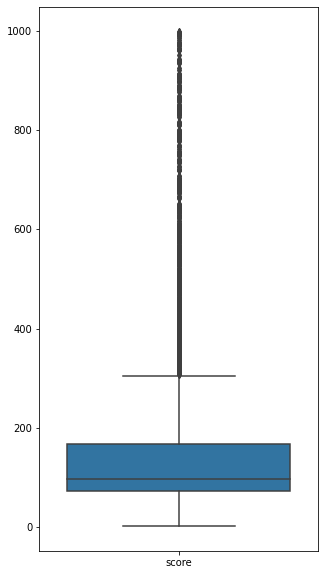

count    4899.000000
mean      156.045111
std       179.746795
min         1.000000
25%        72.000000
50%        97.000000
75%       166.000000
max       999.000000
Name: score, dtype: float64


In [53]:
score=pd.DataFrame(data, columns=['score'])
plt.figure(figsize=(5,10), facecolor='w')
sns.boxplot(data=score)
plt.show()
print(data['score'].describe())

**Let handle outliers in score column**

In [54]:
# Calculate the IQR for the votes column
q1 = data['score'].quantile(0.25)
q3 = data['score'].quantile(0.75)
iqr = q3 - q1
# Identify potential outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers_score =data[(data['score'] < lower_bound) | (data['score'] > upper_bound)].count()
outliers_score

book title    635
ratings       635
avg_score     615
author        635
score         635
votes         635
votes_log     635
dtype: int64

In [55]:
median = np.median(data['score'])
data.loc[(data['score'] < lower_bound) | (data['score'] > upper_bound), 'score'] = median

In [56]:
# Perform log transformation on the 'ratings' column
data['votes_log'] = np.log(data['votes'])

# Check if the transformed data is normally distributed using the Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(data['votes_log'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Statistics=0.631, p=0.000
Data does not look normally distributed (reject H0)


<AxesSubplot: xlabel='score', ylabel='Count'>

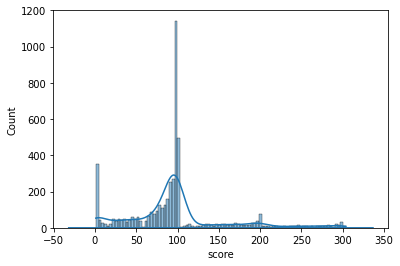

In [57]:
sns.histplot(data=data, x="score", kde=True)
sns.kdeplot(data=data, x="score")

distribution lightly skewded 

In [58]:
from scipy.stats import shapiro

# perform Shapiro-Wilk test
stat, p = shapiro(data['score'])

# interpret the results
alpha = 0.05
if p > alpha:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Data does not look normally distributed (reject H0)


data didnot distributed normally,
- let's do log transformation on them

In [59]:
# Perform log transformation on the 'score' column
data['score_log'] = np.log(data['score'])

# Check if the transformed data is normally distributed using the Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(data['score_log'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Statistics=0.672, p=0.000
Data does not look normally distributed (reject H0)


<AxesSubplot: xlabel='score', ylabel='Count'>

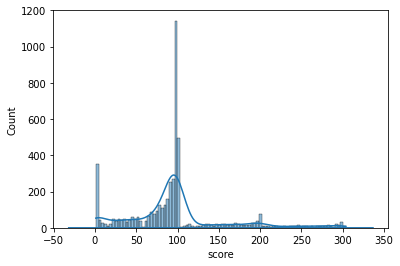

In [60]:
sns.histplot(data=data, x="score", kde=True)
sns.kdeplot(data=data, x="score")

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book title  4899 non-null   object 
 1   ratings     4899 non-null   float64
 2   avg_score   4615 non-null   float64
 3   author      4899 non-null   object 
 4   score       4899 non-null   float64
 5   votes       4899 non-null   float64
 6   votes_log   4899 non-null   float64
 7   score_log   4899 non-null   float64
dtypes: float64(6), object(2)
memory usage: 306.3+ KB


In [62]:
data['avg_score'].isna().sum()

284

In [63]:
data['avg_score'].fillna(data['avg_score'].median(), inplace=True)

In [64]:
data=data.drop(["score_log","votes_log"],axis='columns')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   book title  4899 non-null   object 
 1   ratings     4899 non-null   float64
 2   avg_score   4899 non-null   float64
 3   author      4899 non-null   object 
 4   score       4899 non-null   float64
 5   votes       4899 non-null   float64
dtypes: float64(4), object(2)
memory usage: 229.8+ KB


In [66]:
data.describe()

,ratings,avg_score,score,votes
count,4899.0,4899.000000,4899.000000,4899.000000
mean,255.0,4.013976,96.332517,1.774036
std,0.0,0.245117,59.969489,1.571545
min,255.0,3.320000,1.000000,1.000000
25%,255.0,3.860000,72.000000,1.000000
50%,255.0,4.020000,97.000000,1.000000
75%,255.0,4.170000,100.000000,2.000000
max,255.0,4.710000,304.000000,8.000000


## Exploratory Data Analysis

In [67]:
data.head(5)

,book title,ratings,avg_score,author,score,votes
0,Pride and Prejudice,255.0,4.28,Jane Austen,237.0,1.0
1,"Fifty Shades of Grey (Fifty Shades, #1)",255.0,3.66,E.L. James,231.0,1.0
2,"Beautiful Disaster (Beautiful, #1)",255.0,4.04,Jamie McGuire,216.0,1.0
3,"Twilight (The Twilight Saga, #1)",255.0,3.64,Stephenie Meyer,138.0,1.0
4,"The Notebook (The Notebook, #1)",255.0,4.14,Nicholas Sparks,98.0,1.0


In [68]:
print("number of author",data.author.nunique())

number of author 2439


In [69]:
print("TOp 10 highest book writers")
print(data['author'].value_counts().head(10))

TOp 10 highest book writers
Nora Roberts        70
Kristen Ashley      34
Lisa Kleypas        31
Suzanne Halliday    30
Julia Quinn         26
Eloisa James        24
Nalini Singh        24
Jude Deveraux       22
Ella Fox            21
Julie Garwood       20
Name: author, dtype: int64


In [70]:
dfvalued=data.groupby(['author'])['votes'].sum().reset_index()

dfvalued.sort_values(by="votes",ascending=False).head(10)

,author,votes
1805,Nora Roberts,131.0
1309,Kristen Ashley,91.0
1377,Laurann Dohner,73.0
1747,Nalini Singh,67.0
2303,Tessa Dare,61.0
1467,Lisa Kleypas,57.0
2072,Sarah J. Maas,53.0
671,Eloisa James,52.0
783,Gena Showalter,51.0
786,Georgette Heyer,49.0


In [71]:
# Filter the data to only include books by the Nora Roberts author
author_df = data[data['author'] == 'Nora Roberts'	]
grouped = author_df.groupby('book title')['votes'].sum().reset_index()
sorted_books = grouped.sort_values(by='votes', ascending=False).head(10)
sorted_books

,book title,votes
34,"Key of Valor (Key Trilogy, #3)",7.0
53,The Heart of Devin MacKade (The MacKade Brothe...,7.0
45,River's End,7.0
15,"Daring to Dream (Dream Trilogy, #1)",6.0
62,The Search,6.0
33,"Key of Light (Key Trilogy, #1)",5.0
3,"Black Rose (In the Garden, #2)",5.0
4,"Blood Brothers (Sign of Seven, #1)",5.0
5,"Blue Dahlia (In the Garden, #1)",5.0
55,The Liar,4.0


In [72]:
dfvalued=data.groupby(['author'])['votes'].sum().reset_index()

dfvalued.sort_values(by="votes",ascending=False).head(10)

,author,votes
1805,Nora Roberts,131.0
1309,Kristen Ashley,91.0
1377,Laurann Dohner,73.0
1747,Nalini Singh,67.0
2303,Tessa Dare,61.0
1467,Lisa Kleypas,57.0
2072,Sarah J. Maas,53.0
671,Eloisa James,52.0
783,Gena Showalter,51.0
786,Georgette Heyer,49.0


In [73]:
dfvalued=data.groupby(['book title','author'],as_index=False).votes.max()
print("Top 10 books by  votes  ")
dfvalued.sort_values(by="votes",ascending=False).head(10)

Top 10 books by  votes  


,book title,author,votes
2796,"Point of Retreat (Slammed, #2)",Colleen Hoover,8.0
3088,"Say Yes to the Marquess (Castles Ever After, #2)",Tessa Dare,8.0
4471,"Treading Water (Treading Water, #1)",Marie Force,8.0
4842,"Wrong (Cafe, #1)",Jana Aston,8.0
1993,"Kiss of Crimson (Midnight Breed, #2)",Lara Adrian,8.0
3016,"Royally Screwed (Royally, #1)",Emma Chase,8.0
3978,The Masqueraders,Georgette Heyer,8.0
1316,Faro's Daughter,Georgette Heyer,8.0
2370,"Mine to Possess (Psy-Changeling, #4)",Nalini Singh,8.0
181,"Abandon (Abandon, #1)",Meg Cabot,8.0


In [74]:
dfvalued=data.groupby(['book title','author'],as_index=False).ratings.max()
print("Top 10 books by rating")
dfvalued.sort_values(by="ratings",ascending=False).head(10)

Top 10 books by rating


,book title,author,ratings
0,"#Hater (Hashtag, #2)",Cambria Hebert,255.0
3262,"Skye O'Malley (O'Malley Saga, #1)",Bertrice Small,255.0
3269,"Sleepless in Scotland (MacLean Curse, #4)",Karen Hawkins,255.0
3268,"Sleeping With the Wolf (After the Crash, #1)",Maddy Barone,255.0
3267,"Slay Me (Rock Gods, #2)",Joanna Blake,255.0
3266,"Slave to Sensation (Psy-Changeling, #1)",Nalini Singh,255.0
3265,"Slave (Finding Anna, #1)",Sherri Hayes,255.0
3264,"Slammed (Slammed, #1)",Colleen Hoover,255.0
3263,"Slade (New Species, #2)",Laurann Dohner,255.0
3261,"Sizzle (Bad Boy Rockers, #1)",Lexi Buchanan,255.0


In [75]:
from tabulate import tabulate
grouped = data.groupby(['book title', 'author']).agg({'ratings': 'mean', 'votes': 'sum', 'avg_score': 'mean'}).reset_index()
sorted_books = grouped.sort_values(by=['ratings', 'votes', 'avg_score'], ascending=False)
top_books= sorted_books.head(10)

print("Top 10 books by ratings, votes, and average score:")
# Print the data as a table using tabulate for better view
print(tabulate(top_books, headers="keys", tablefmt="grid"))

Top 10 books by ratings, votes, and average score:
+------+----------------------------------------------------+------------------------+-----------+---------+-------------+
|      | book title                                         | author                 |   ratings |   votes |   avg_score |
+======+====================================================+========================+===========+=========+=============+
| 1203 | Empire of Storms (Throne of Glass, #5)             | Sarah J. Maas          |       255 |       8 |        4.57 |
+------+----------------------------------------------------+------------------------+-----------+---------+-------------+
| 2975 | Rock Chick Redemption (Rock Chick, #3)             | Kristen Ashley         |       255 |       8 |        4.41 |
+------+----------------------------------------------------+------------------------+-----------+---------+-------------+
|  804 | City of Heavenly Fire (The Mortal Instruments, #6) | Cassandra Clare        |  